In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Import data
df = pd.read_csv('./medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [130]:
# Add 'overweight' column
bmi = df['weight'] / (df['height']/100) ** 2
# print(bmi)
df['overweight'] = df.apply(lambda x: 1 if x['weight'] / (x['height']/100) ** 2 > 25 else 0, axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [131]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [132]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x <= 1 else 1)
df['cholesterol']

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [133]:
df['gluc']

0        1
1        1
2        1
3        1
4        1
        ..
69995    1
69996    2
69997    1
69998    2
69999    1
Name: gluc, Length: 70000, dtype: int64

In [134]:
df['gluc'] = df['gluc'].apply(lambda x: 0 if x <= 1 else 1)
df['gluc']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64

# Draw Categorical Plot

```py 
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = None


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None
    

    # Draw the catplot with 'sns.catplot()'


    # Get the figure for the output
    fig = None
```

In [135]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_melt = df.melt(id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_melt

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [136]:
value_counts = df_melt.groupby(['cardio', 'variable', 'value']).value_counts()
value_counts
# nur zur ünbersicht ob der nächste df richtig ist


cardio  variable     value
0       active       0         6378
                     1        28643
        alco         0        33080
                     1         1941
        cholesterol  0        29330
                     1         5691
        gluc         0        30894
                     1         4127
        overweight   0        15915
                     1        19106
        smoke        0        31781
                     1         3240
1       active       0         7361
                     1        27618
        alco         0        33156
                     1         1823
        cholesterol  0        23055
                     1        11924
        gluc         0        28585
                     1         6394
        overweight   0        10539
                     1        24440
        smoke        0        32050
                     1         2929
Name: count, dtype: int64

In [137]:
df_cat = df_melt.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
df_cat


,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


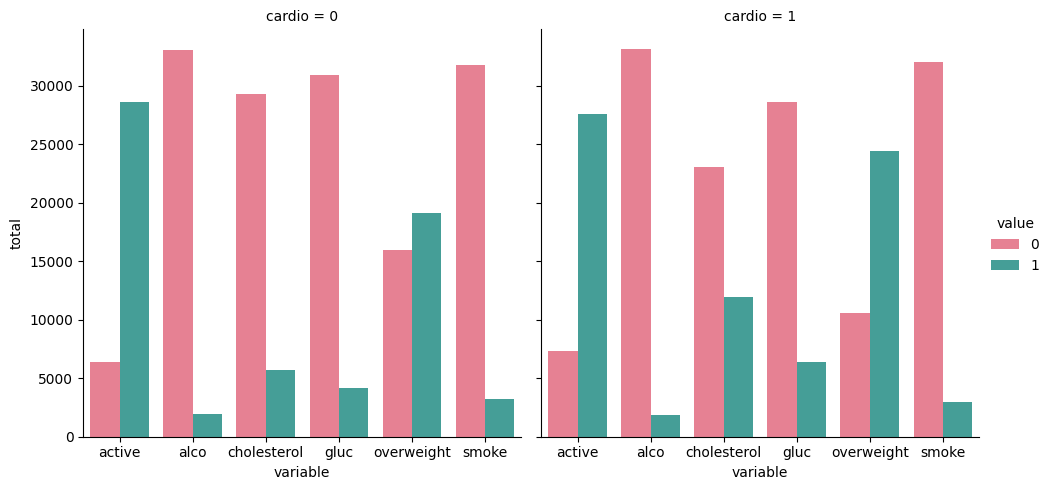

In [138]:
# Draw the catplot with 'sns.catplot()'
sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value', palette='husl')

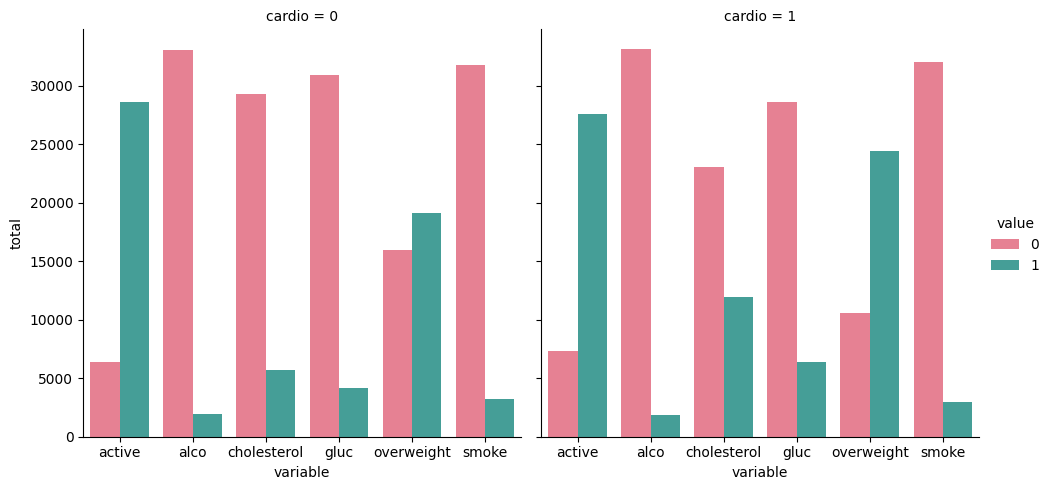

In [139]:
fig = sns.catplot(data=df_cat, x='variable', y='total', col='cardio', kind='bar', hue='value', palette='husl')
fig.savefig('plot1.png')

# Draw Heat Map

```py
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None

    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'
```

In [140]:
# Clean the data
df.iloc[225:245]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
225,310,17471,1,156,65.0,120,80,0,0,0,0,1,0,1
226,311,15825,2,166,70.0,110,70,0,0,1,0,1,0,1
227,312,14373,1,168,68.0,120,79,0,0,0,0,1,1,0
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,1
229,316,20259,2,169,65.0,130,80,0,0,0,0,0,0,0
230,318,23376,2,175,75.0,180,100,1,0,1,1,1,1,0
231,320,19545,2,168,72.0,120,80,1,0,0,0,1,1,1
232,321,18444,2,173,75.0,130,80,1,0,1,1,0,0,1
233,322,20490,2,185,81.0,110,70,0,0,0,0,1,1,0
234,324,21377,1,149,60.0,120,80,0,0,0,0,0,0,1


In [141]:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
df_clean = df[df['ap_lo'] <= df['ap_hi']]
df_clean.iloc[225:245]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
225,310,17471,1,156,65.0,120,80,0,0,0,0,1,0,1
226,311,15825,2,166,70.0,110,70,0,0,1,0,1,0,1
227,312,14373,1,168,68.0,120,79,0,0,0,0,1,1,0
229,316,20259,2,169,65.0,130,80,0,0,0,0,0,0,0
230,318,23376,2,175,75.0,180,100,1,0,1,1,1,1,0
231,320,19545,2,168,72.0,120,80,1,0,0,0,1,1,1
232,321,18444,2,173,75.0,130,80,1,0,1,1,0,0,1
233,322,20490,2,185,81.0,110,70,0,0,0,0,1,1,0
234,324,21377,1,149,60.0,120,80,0,0,0,0,0,0,1
235,325,20421,2,170,68.0,150,100,0,0,0,0,1,1,0


In [142]:
df_clean.shape

(68766, 14)

`quantile(p)` teilt datensätze in gleich große teile, sodass p% der datenpnkte über und (1-p)% unter dem quantil liegen.
    bsp. median - teilt datenmenge in zwei teile, 50% der punkte liegen über der median und 50% darunter

`quartile(p)` spezielle variante von quantile, die daten in 4 teile aufteilt

`percentile(p)` teilt datensätze in 100 gleich große teile. das p-te percentile ist der wert, unter dem p% der datenpunkte fallen.
    bsp. p=75 heißt 75% der datenpunkte liegen unter diesem wert bzw. der wert liegt über 75% der datenpunkte

somit sind`percentile(2.5)` und `quantile(0.025)` äquivalent

In [143]:
# die cleaning schritte nacheinander zu machen wäre falsch, weil die anteile sich dann auf den jeweils schon bereinigten df beziehen und nicht auf die original daten
# deswegen muss ich die anteile erst ausrechnen und dann weiter verwendenheight_quantile_low = df['height'].quantile(0.025)
height_less = df['height'].quantile(0.025)
height_more = df['height'].quantile(0.975)
weight_less = df['weight'].quantile(0.025)
weight_more = df['weight'].quantile(0.975)

In [144]:
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# df_clean = df_clean[df_clean['height'] >= df_clean['height'].quantile(0.025)]
# df_clean.shape
df_clean = df_clean[df_clean['height'] >= height_less]
df_clean.shape

(67260, 14)

In [145]:
# height is more than the 97.5th percentile
# df_clean = df_clean[df_clean['height'] <= df_clean['height'].quantile(0.975)]
# df_clean.shape
df_clean = df_clean[df_clean['height'] <= height_more]
df_clean.shape


(65859, 14)

In [146]:
# weight is less than the 2.5th percentile
# df_clean = df_clean[df_clean['weight'] >= df_clean['weight'].quantile(0.025)]
# df_clean.shape
df_clean = df_clean[df_clean['weight'] >= weight_less]
df_clean.shape


(64623, 14)

In [147]:
# weight is more than the 97.5th percentile
# df_clean = df_clean[df_clean['weight'] <= df_clean['weight'].quantile(0.975)]
# df_clean.shape
df_clean = df_clean[df_clean['weight'] <= weight_more]
df_clean.shape

(63259, 14)

In [148]:
df_heat = df_clean
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [149]:
# Calculate the correlation matrix
    # corr = None

    # Generate a mask for the upper triangle
    # mask = None

    # Set up the matplotlib figure
    # fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'

In [150]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [151]:
# Generate a mask for the upper triangle
# `np.triu` - upper triangle -> copy des arrays in der die elemente unterhalb der diagonale 0 sind;
# `np.tril()` - lower triangle
# `np.ones_like()` - returnt array mit identischem shape & type aber mit 1 gefüllt
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

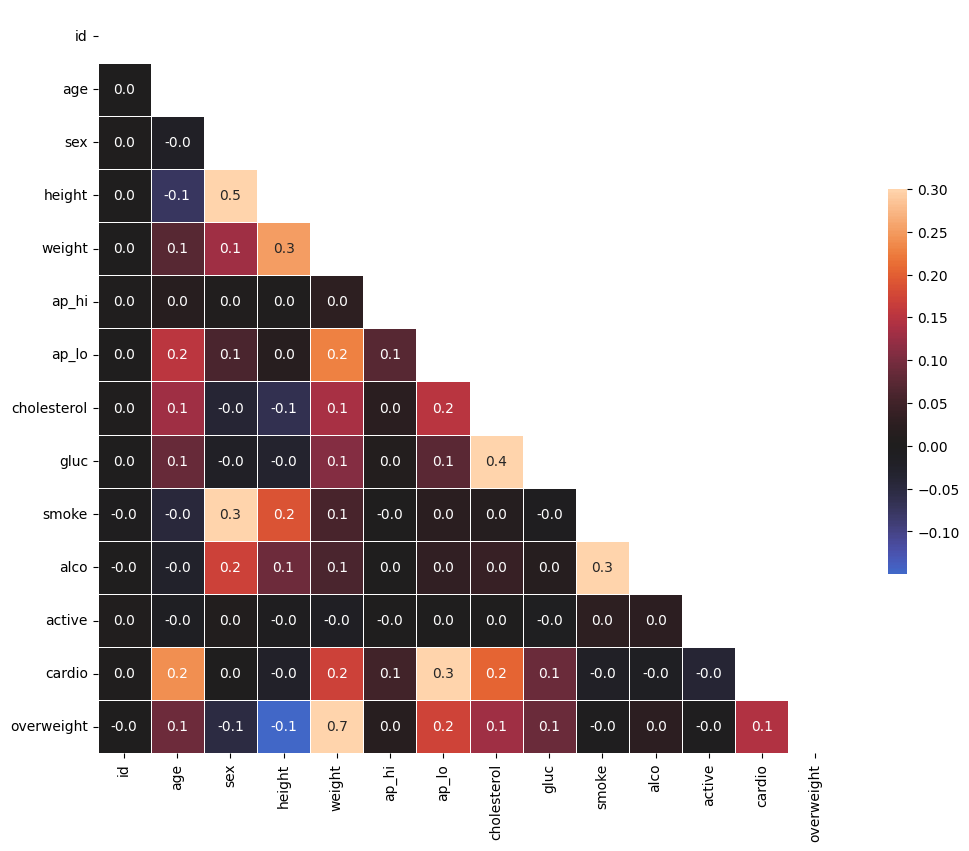

In [152]:
# Set up the matplotlib figure
# Draw the heatmap with 'sns.heatmap()'
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, mask=mask, fmt=".1f", cbar_kws={"shrink": 0.5}, square=True, center=0, vmax=0.3, linewidth=0.5)

In [153]:
fig.savefig('plot2.png')